In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Ontario Energy Demand Data

In [2]:
demand17 = pd.read_csv('PUB_Demand_2017.csv', skiprows=3)

In [3]:
demand17.head(30)

,Date,Hour,Market Demand,Ontario Demand
0,2017-01-01,1,17172,13522
1,2017-01-01,2,16757,13117
2,2017-01-01,3,16370,12816
3,2017-01-01,4,16075,12605
4,2017-01-01,5,16050,12563
5,2017-01-01,6,15797,12544
6,2017-01-01,7,15861,12758
7,2017-01-01,8,16137,13065
8,2017-01-01,9,16143,13367
9,2017-01-01,10,16530,13644


In [4]:
demand16 = pd.read_csv('PUB_Demand_2016.csv', skiprows=3)
demand15 = pd.read_csv('PUB_Demand_2015.csv', skiprows=3)
demand14 = pd.read_csv('PUB_Demand_2014.csv', skiprows=3)
demand13 = pd.read_csv('PUB_Demand_2013.csv', skiprows=3)

In [5]:
demand17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
Date              8760 non-null object
Hour              8760 non-null int64
Market Demand     8760 non-null int64
Ontario Demand    8760 non-null int64
dtypes: int64(3), object(1)
memory usage: 273.8+ KB


In [6]:
demand16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
Date              8784 non-null object
Hour              8784 non-null int64
Market Demand     8784 non-null int64
Ontario Demand    8784 non-null int64
dtypes: int64(3), object(1)
memory usage: 274.6+ KB


demand16 has 24 more rows because it is a leap year, so there is one extra day.

In [7]:
demand15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
Date              8760 non-null object
Hour              8760 non-null int64
Market Demand     8760 non-null int64
Ontario Demand    8760 non-null int64
dtypes: int64(3), object(1)
memory usage: 273.8+ KB


In [8]:
demand14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
Date              8760 non-null object
Hour              8760 non-null int64
Market Demand     8760 non-null int64
Ontario Demand    8760 non-null int64
dtypes: int64(3), object(1)
memory usage: 273.8+ KB


In [9]:
demand13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
Date              8760 non-null object
Hour              8760 non-null int64
Market Demand     8760 non-null int64
Ontario Demand    8760 non-null int64
dtypes: int64(3), object(1)
memory usage: 273.8+ KB


In [10]:
demand17['Date'] = pd.to_datetime(demand17['Date'])
demand17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
Date              8760 non-null datetime64[ns]
Hour              8760 non-null int64
Market Demand     8760 non-null int64
Ontario Demand    8760 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 273.8 KB


In [11]:
demand16['Date'] = pd.to_datetime(demand16['Date'])
demand15['Date'] = pd.to_datetime(demand15['Date'])
demand14['Date'] = pd.to_datetime(demand14['Date'])
demand13['Date'] = pd.to_datetime(demand13['Date'])

In [12]:
demand17['month'] = demand17['Date'].apply(lambda x: x.month)
demand17['month'].value_counts()

7     744
5     744
12    744
3     744
10    744
1     744
8     744
6     720
4     720
11    720
9     720
2     672
Name: month, dtype: int64

In [13]:
demand16['month'] = demand16['Date'].apply(lambda x: x.month)
demand16['month'].value_counts()

7     744
5     744
12    744
3     744
10    744
1     744
8     744
6     720
4     720
11    720
9     720
2     696
Name: month, dtype: int64

In [14]:
demand15['month'] = demand15['Date'].apply(lambda x: x.month)
demand14['month'] = demand14['Date'].apply(lambda x: x.month)
demand13['month'] = demand13['Date'].apply(lambda x: x.month)

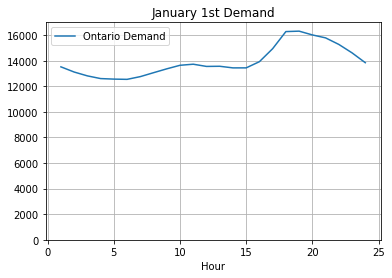

In [15]:
demand17.loc[0:23].plot(x='Hour', y='Ontario Demand', grid=True, ylim=[0, 17000], title='January 1st Demand');

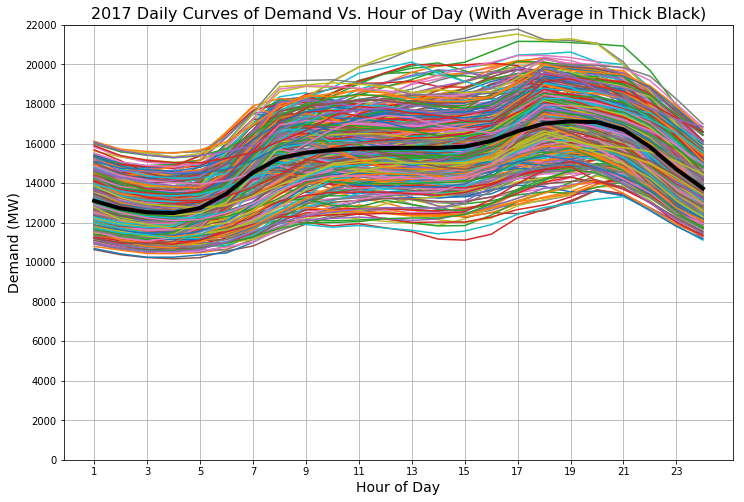

In [16]:
plt.figure(figsize=(12, 8))
cols = []
for day, day_df in demand17.groupby('Date'):
    cols.append(day_df['Ontario Demand'].values)
cols = np.array(cols).T  # Turn list of vectors into numpy array and take transpose
avg_day17 = np.mean(cols, axis=1)
plt.ylim([0, 22000])
plt.yticks(range(0, 22001, 2000))
plt.xticks(np.arange(1, 25, 2))
plt.ylabel('Demand (MW)', size=14)
plt.xlabel('Hour of Day', size=14)
plt.plot(np.arange(1, 25), cols)
plt.plot(np.arange(1, 25), avg_day17, linewidth=4, color='black')
plt.grid()
plt.title('2017 Daily Curves of Demand Vs. Hour of Day (With Average in Thick Black)', size=16)
plt.savefig('2017_demand_curves.png')
plt.show()

In [17]:
demand17.head()

,Date,Hour,Market Demand,Ontario Demand,month
0,2017-01-01,1,17172,13522,1
1,2017-01-01,2,16757,13117,1
2,2017-01-01,3,16370,12816,1
3,2017-01-01,4,16075,12605,1
4,2017-01-01,5,16050,12563,1


In [18]:
demand17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 5 columns):
Date              8760 non-null datetime64[ns]
Hour              8760 non-null int64
Market Demand     8760 non-null int64
Ontario Demand    8760 non-null int64
month             8760 non-null int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 342.3 KB


In [19]:
def get_season(month):
    # Uses the "meteorological" definition of the seasons (see https://en.wikipedia.org/wiki/Season#Meteorological)
    if month < 3: return 1  # Jan or Feb
    if month < 6: return 2  # Mar - May
    if month < 9: return 3  # June - Aug
    if month < 12: return 4  # Sept - Nov
    else: return 1  # Dec

In [20]:
demand17['season'] = demand17['month'].apply(get_season)
demand16['season'] = demand16['month'].apply(get_season)
demand15['season'] = demand15['month'].apply(get_season)
demand14['season'] = demand14['month'].apply(get_season)
demand13['season'] = demand13['month'].apply(get_season)

In [21]:
demand17['season'].value_counts()

3    2208
2    2208
4    2184
1    2160
Name: season, dtype: int64

In [22]:
demand17.head()

,Date,Hour,Market Demand,Ontario Demand,month,season
0,2017-01-01,1,17172,13522,1,1
1,2017-01-01,2,16757,13117,1,1
2,2017-01-01,3,16370,12816,1,1
3,2017-01-01,4,16075,12605,1,1
4,2017-01-01,5,16050,12563,1,1


### Plot demand curves grouped by season:

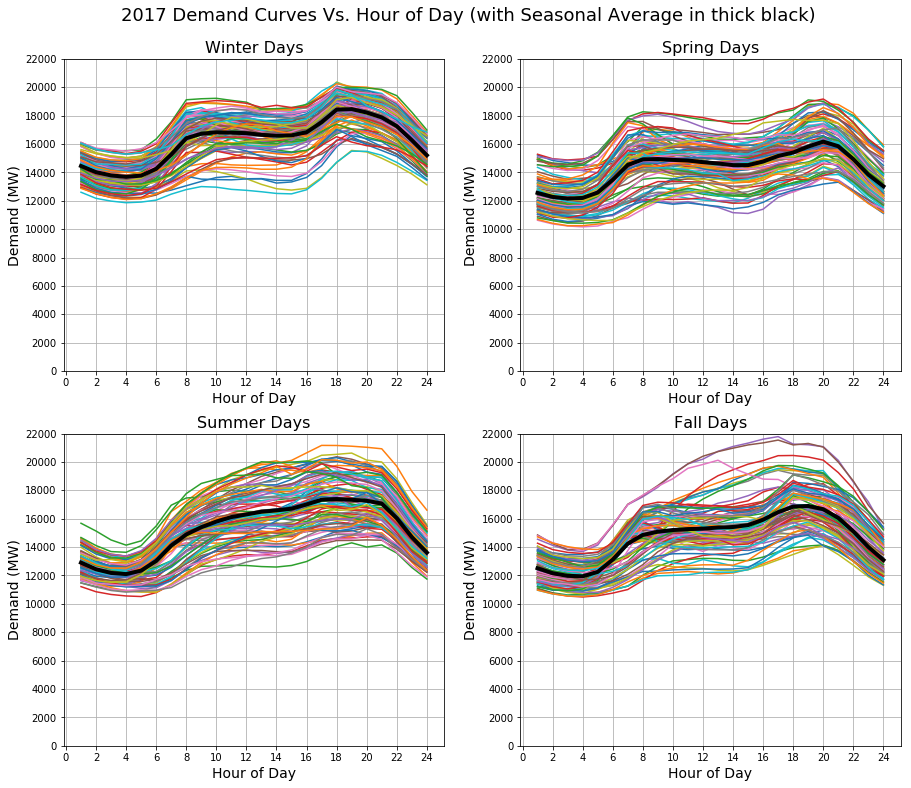

In [23]:
plt.figure(figsize=(15, 12))
seasons_dict = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
seasons_avgs17 = []
for season_num, df in demand17.groupby('season'):
    plt.subplot(2, 2, season_num)
    plt.title(seasons_dict[season_num] + ' Days', size=16)
    cols = []
    for day, df_day in df.groupby('Date'):
        cols.append(df_day['Ontario Demand'].values)
    cols = np.array(cols).T  # Turn list of vectors into numpy array and take transpose
    cols_avg = np.mean(cols, axis=1)
    seasons_avgs17.append(cols_avg)
    plt.ylim([0, 22000])
    plt.yticks(range(0, 22001, 2000))
    plt.xticks(np.arange(0, 25, 2))
    plt.ylabel('Demand (MW)', size=14)
    plt.xlabel('Hour of Day', size=14)
    plt.plot(np.arange(1, 25), cols)
    plt.plot(np.arange(1, 25), cols_avg, linewidth=4, color='black')
    plt.grid()
    
plt.suptitle('2017 Demand Curves Vs. Hour of Day (with Seasonal Average in thick black)', size=18)
plt.subplots_adjust(top=0.92)
plt.savefig('2017_demand_curves_by_season.png')
plt.show();

In [24]:
seasons_avgs17 = np.array(seasons_avgs17).T  # Turn list of vectors into numpy array and take transpose
seasons_avgs17.shape

(24, 4)

In [25]:
cols = [seasons_dict[i] for i in range(1, 5)]
seasons_avgs17 = pd.DataFrame(seasons_avgs17, columns=cols)
seasons_avgs17

,Winter,Spring,Summer,Fall
0,14455.788889,12557.565217,12905.445652,12512.461538
1,14021.344444,12278.043478,12439.206522,12162.802198
2,13790.744444,12155.847826,12179.858696,11977.703297
3,13692.900000,12204.826087,12099.608696,11942.219780
4,13774.955556,12581.630435,12344.597826,12254.120879
5,14253.055556,13479.641304,13024.652174,13120.395604
6,15268.088889,14528.793478,14104.978261,14242.791209
7,16407.455556,14919.336957,14887.641304,14856.362637
8,16729.388889,14944.782609,15404.108696,15085.417582
9,16825.422222,14884.934783,15798.195652,15204.483516


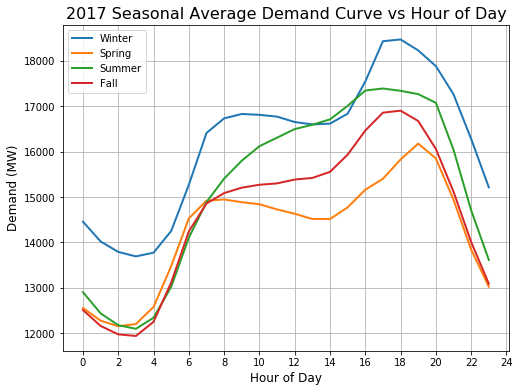

In [26]:
plt.figure(figsize=(8, 6))
plt.title('2017 Seasonal Average Demand Curve vs Hour of Day', size=16)
# plt.ylim([0, 20000])
plt.ylabel('Demand (MW)', size=12)
plt.xlabel('Hour of Day', size=12)
plt.xticks(range(0, 25, 2))
plt.plot(seasons_avgs17, linewidth=2)
plt.legend(seasons_avgs17.columns)
plt.savefig('2017_demand_curves_seasonal_avg.png')
plt.grid()
plt.show();

### Plot demand curves grouped by month:

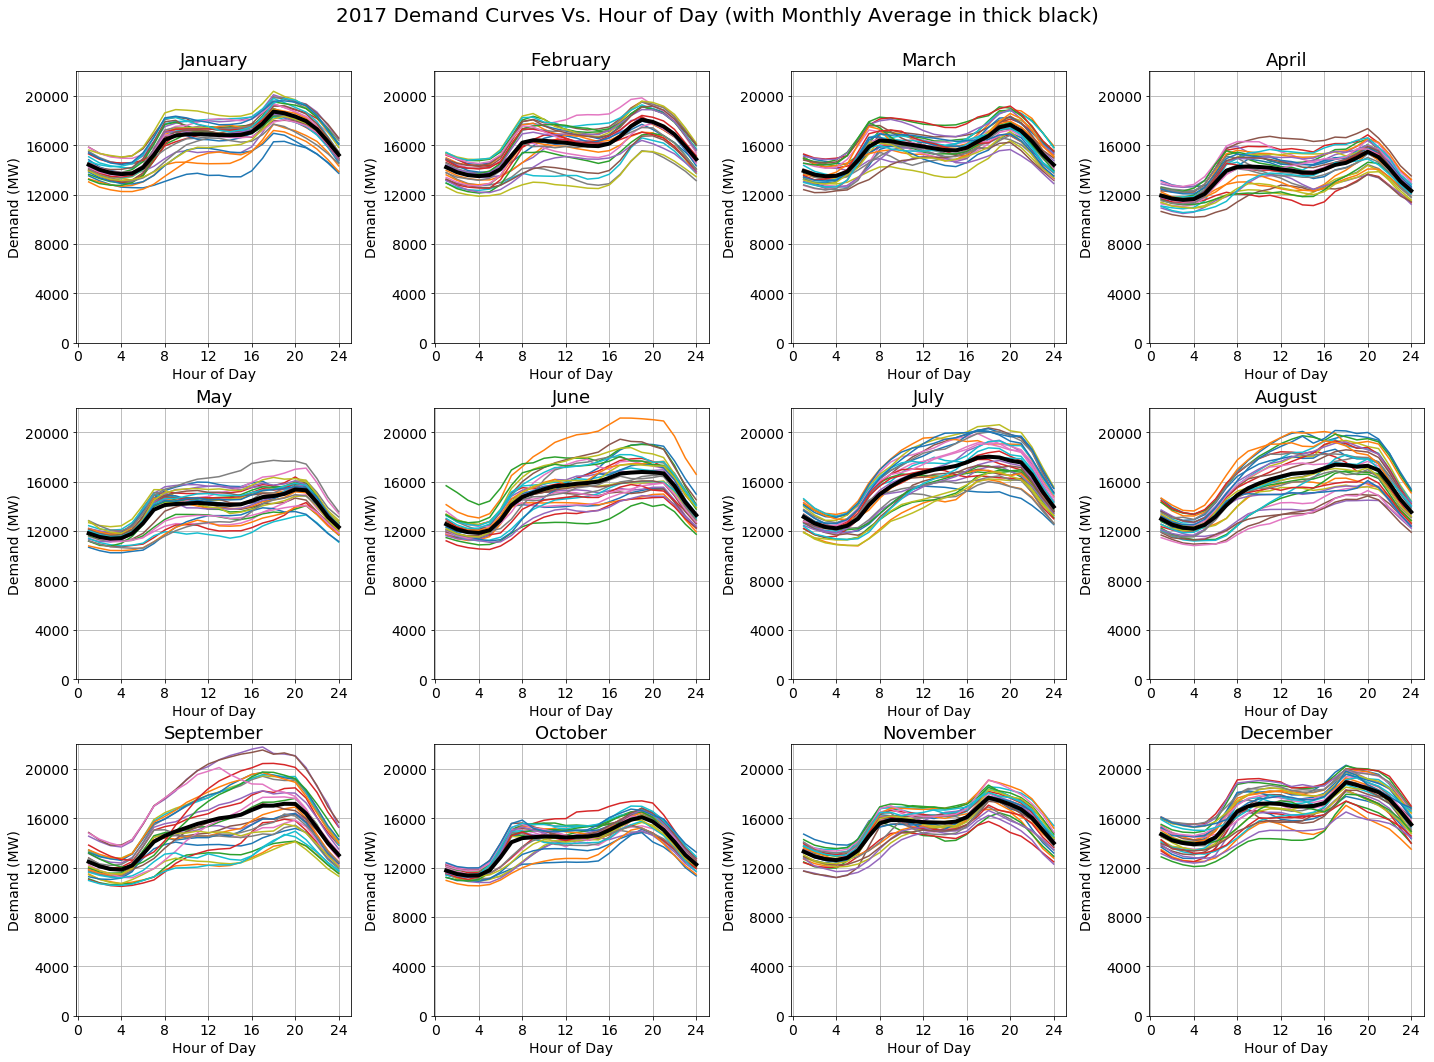

In [27]:
months_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
month_avgs17 = []
fig = plt.figure(figsize=(20, 15))
for month_num, df_month in demand17.groupby('month'):
    plt.subplot(3, 4, month_num)
    plt.title(months_dict[month_num], size=18)
    cols = []
    for day, df_day in df_month.groupby('Date'):
        cols.append(df_day['Ontario Demand'].values)
    cols = np.array(cols).T  # Turn list of vectors into numpy array and take transpose
    cols_avg = np.mean(cols, axis=1)
    month_avgs17.append(cols_avg)
    plt.ylim([0, 22000])
    plt.yticks(range(0, 22001, 4000), size=14)
    plt.xticks(np.arange(0, 25, 4), size=14)
    plt.ylabel('Demand (MW)', size=14)
    plt.xlabel('Hour of Day', size=14)
    plt.plot(np.arange(1, 25), cols)
    plt.plot(np.arange(1, 25), cols_avg, linewidth=4, color='black')
    plt.grid()
    
plt.suptitle('2017 Demand Curves Vs. Hour of Day (with Monthly Average in thick black)', size=20)
plt.tight_layout(pad=1.0, h_pad=1)
plt.subplots_adjust(top=0.92)
plt.savefig('2017_demand_curves_by_month.png')
plt.show();

In [28]:
month_avgs17 = np.array(month_avgs17).T  # Turn list of vectors into numpy array and take transpose
month_avgs17.shape

(24, 12)

In [29]:
cols = [months_dict[i] for i in range(1, 13)]
month_avgs17 = pd.DataFrame(month_avgs17, columns=cols)
month_avgs17

,January,February,March,April,May,June,July,August,September,October,November,December
0,14422.548387,14216.571429,13912.258065,11917.233333,11822.548387,12560.166667,13150.677419,12994.354839,12481.833333,11769.677419,13310.633333,14705.096774
1,14013.096774,13810.142857,13609.451613,11673.800000,11531.387097,12143.600000,12633.870968,12530.612903,12113.666667,11486.612903,12910.666667,14220.354839
2,13765.967742,13577.857143,13487.064516,11570.166667,11391.419355,11915.766667,12337.225806,12278.064516,11894.900000,11355.354839,12703.600000,14007.806452
3,13660.645161,13498.750000,13526.032258,11633.033333,11436.967742,11857.666667,12227.516129,12205.838710,11843.633333,11381.354839,12620.366667,13900.516129
4,13722.225806,13586.142857,13856.838710,12061.233333,11810.032258,12078.033333,12435.322581,12511.838710,12180.100000,11798.677419,12798.766667,13998.225806
5,14191.967742,14080.392857,14785.645161,12996.066667,12641.612903,12889.766667,13007.870968,13171.967742,13109.733333,12853.193548,13407.166667,14470.096774
6,15224.516129,15142.535714,15886.161290,13941.133333,13740.129032,14102.833333,14106.548387,14105.483871,14103.766667,14068.193548,14562.233333,15425.064516
7,16440.354839,16206.250000,16384.935484,14235.766667,14115.258065,14760.600000,14983.258065,14914.967742,14586.066667,14399.645161,15598.600000,16556.290323
8,16776.870968,16401.285714,16330.838710,14281.866667,14200.258065,15103.900000,15618.903226,15479.838710,14943.133333,14474.870968,15858.600000,16978.258065
9,16883.870968,16370.857143,16162.483871,14237.766667,14233.677419,15398.533333,16113.709677,15869.451613,15241.033333,14534.322581,15860.433333,17177.548387


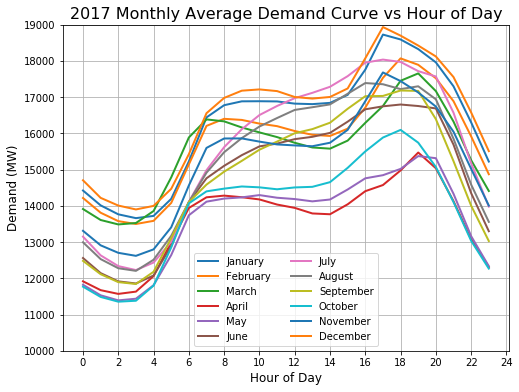

In [30]:
plt.figure(figsize=(8, 6))
plt.title('2017 Monthly Average Demand Curve vs Hour of Day', size=16)
plt.ylim([10000, 19000])
plt.ylabel('Demand (MW)', size=12)
plt.xlabel('Hour of Day', size=12)
plt.xticks(range(0, 25, 2))
plt.plot(month_avgs17, linewidth=2)
plt.legend(month_avgs17.columns, ncol=2)
plt.savefig('2017_demand_curves_monthly_avg.png')
plt.grid()
plt.show();

### Plot demand curves grouped by year:

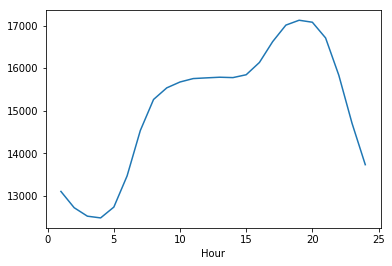

In [31]:
mean_demand_curve17 = demand17.groupby('Hour')['Ontario Demand'].agg('mean')
mean_demand_curve17.plot()

In [32]:
mean_demand_curve16 = demand16.groupby('Hour')['Ontario Demand'].agg('mean')
mean_demand_curve15 = demand15.groupby('Hour')['Ontario Demand'].agg('mean')
mean_demand_curve14 = demand14.groupby('Hour')['Ontario Demand'].agg('mean')
mean_demand_curve13 = demand13.groupby('Hour')['Ontario Demand'].agg('mean')
yearly_demand_curves = pd.DataFrame({'2013': mean_demand_curve13, '2014': mean_demand_curve14, '2015': mean_demand_curve15,
                                    '2016': mean_demand_curve16, '2017': mean_demand_curve17})
yearly_demand_curves.head()

,2013,2014,2015,2016,2017
Hour,,,,,
1,13871.663014,13889.038356,13641.989041,13533.795082,13102.060274
2,13477.295890,13511.893151,13252.931507,13127.166667,12719.789041
3,13275.945205,13310.471233,13050.104110,12904.633880,12520.610959
4,13246.030137,13283.315068,13021.087671,12860.092896,12479.756164
5,13500.235616,13551.778082,13285.172603,13102.420765,12734.476712


In [33]:
yearly_demand_curves.describe()

,2013,2014,2015,2016,2017
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,16065.842922,15959.340753,15640.614155,15595.371926,15078.880365
std,1676.750901,1586.447592,1558.870043,1637.004549,1544.178594
min,13246.030137,13283.315068,13021.087671,12860.092896,12479.756164
25%,14475.460959,14491.303425,14226.469178,14112.825137,13664.408904
50%,16844.873973,16677.654795,16272.272603,16216.121585,15713.497260
75%,17131.238356,16844.213014,16516.312329,16520.252049,15915.628767
max,18050.646575,17980.120548,17698.558904,17781.308743,17124.046575


Note that the mean demand has dropped every year.

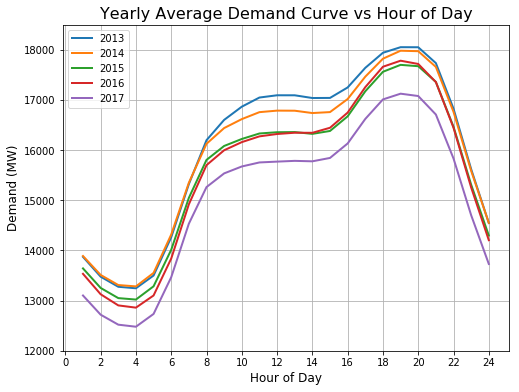

In [34]:
plt.figure(figsize=(8, 6))
plt.title('Yearly Average Demand Curve vs Hour of Day', size=16)
plt.ylim([12000, 18500])
plt.ylabel('Demand (MW)', size=12)
plt.xlabel('Hour of Day', size=12)
plt.xticks(range(0, 25, 2))
plt.plot(yearly_demand_curves, linewidth=2)
plt.legend(yearly_demand_curves.columns)
plt.savefig('demand_curves_yearly_avg.png')
plt.grid()
plt.show();

### Daily Means

In [35]:
daily_mean17 = demand17.groupby('Date')[['Date', 'Ontario Demand']].agg('mean')

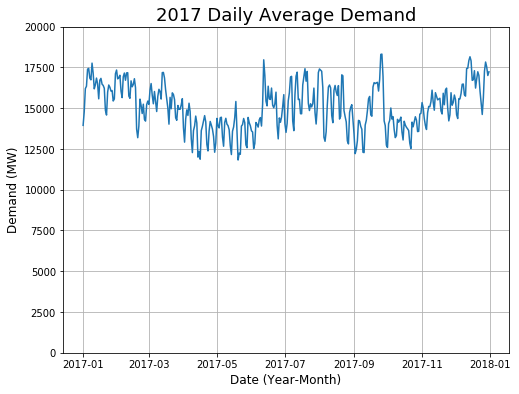

In [36]:
plt.figure(figsize=(8, 6))
plt.title('2017 Daily Average Demand', size=18)
plt.ylim([0, 20000])
plt.ylabel('Demand (MW)', size=12)
plt.xlabel('Date (Year-Month)', size=12)
plt.plot(daily_mean17)
plt.grid()
plt.savefig('2017_mean_daily_demand.png')
plt.show();

In [37]:
daily_mean16 = demand16.groupby('Date')[['Date', 'Ontario Demand']].agg('mean')
daily_mean15 = demand15.groupby('Date')[['Date', 'Ontario Demand']].agg('mean')
daily_mean14 = demand14.groupby('Date')[['Date', 'Ontario Demand']].agg('mean')
daily_mean13 = demand13.groupby('Date')[['Date', 'Ontario Demand']].agg('mean')
daily_mean = pd.concat([daily_mean13, daily_mean14, daily_mean15, daily_mean16, daily_mean17])

In [38]:
daily_mean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2013-01-01 to 2017-12-31
Data columns (total 1 columns):
Ontario Demand    1826 non-null float64
dtypes: float64(1)
memory usage: 28.5 KB


In [39]:
daily_mean.head()

,Ontario Demand
Date,
2013-01-01,15472.083333
2013-01-02,17540.250000
2013-01-03,18057.333333
2013-01-04,17341.708333
2013-01-05,16165.916667


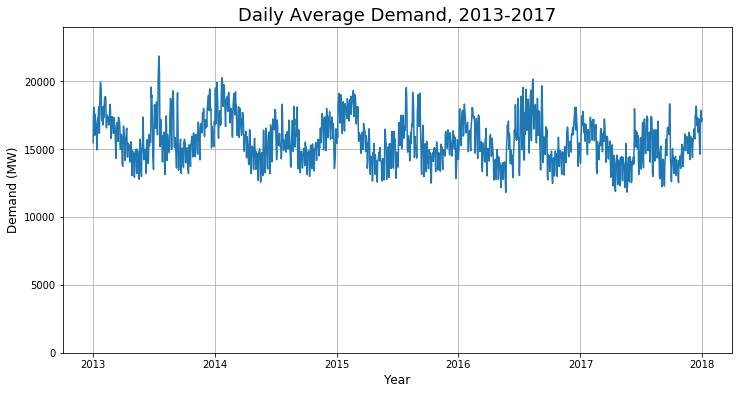

In [40]:
plt.figure(figsize=(12, 6))
plt.title('Daily Average Demand, 2013-2017', size=18)
plt.ylim([0, 24000])
plt.ylabel('Demand (MW)', size=12)
plt.xlabel('Year', size=12)
plt.plot(daily_mean)
plt.grid()
plt.savefig('mean_daily_demand.png')
plt.show();

In [41]:
monthly_mean17 = demand17.groupby('month')['Ontario Demand'].agg('mean')

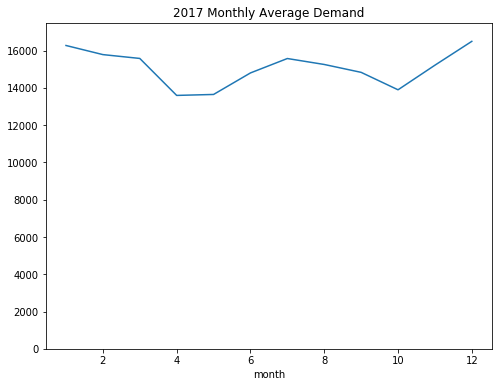

In [42]:
monthly_mean17.plot(figsize=(8, 6), title='2017 Monthly Average Demand', ylim=[0, 17500])

In [43]:
monthly_mean = daily_mean.copy()
monthly_mean.reset_index(inplace=True)
monthly_mean['year_month'] = monthly_mean['Date'].apply(
    lambda x: str(x.year) + '-' + str(x.month) + '-01' if x.month >= 10 else str(x.year) + '-0' + str(x.month) + '-01')
monthly_mean['year_month'] = pd.to_datetime(monthly_mean['year_month'])
monthly_mean.head()

,Date,Ontario Demand,year_month
0,2013-01-01,15472.083333,2013-01-01
1,2013-01-02,17540.250000,2013-01-01
2,2013-01-03,18057.333333,2013-01-01
3,2013-01-04,17341.708333,2013-01-01
4,2013-01-05,16165.916667,2013-01-01


The data in the year_month column all have the same day so that the day doesn't interfere with groupby. Some day is required for a valid datetime, so I chose the first of the month.

In [44]:
monthly_mean = monthly_mean.groupby('year_month')['Ontario Demand'].agg('mean')
monthly_mean.head()

year_month
2013-01-01    17324.606183
2013-02-01    17473.580357
2013-03-01    16073.009409
2013-04-01    15201.258333
2013-05-01    14496.537634
Name: Ontario Demand, dtype: float64

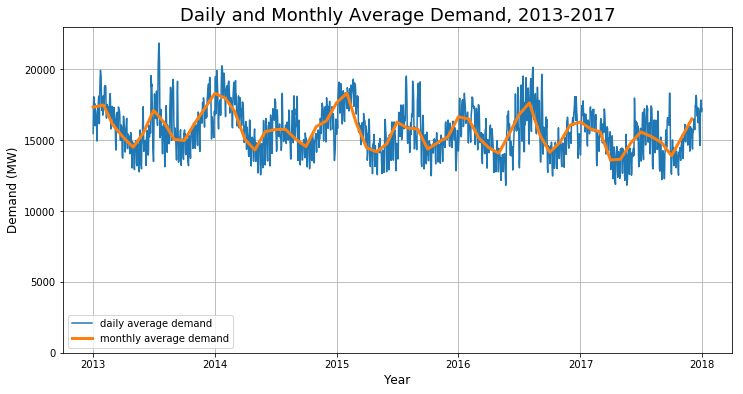

In [45]:
plt.figure(figsize=(12, 6))
plt.title('Daily and Monthly Average Demand, 2013-2017', size=18)
plt.ylim([0, 23000])
plt.ylabel('Demand (MW)', size=12)
plt.xlabel('Year', size=12)
plt.plot(daily_mean.index, daily_mean)
plt.plot(monthly_mean.index, monthly_mean, linewidth=3)
plt.grid()
plt.legend(labels=('daily average demand', 'monthly average demand'), loc='lower left')
plt.savefig('mean_daily_monthly_demand.png')
plt.show();

## Monthly averages of the Hourly Ontario Energy Price (HOEP), 2002-Present

In [46]:
hoep_avgs_df = pd.read_csv('HOEPMonthlyAverages.csv')
hoep_avgs_df.head()

,Month,Arithmetic Ave,Weighted Ave,Unnamed: 3,Arithmetic On Peak Ave,Arithmetic Off Peak Ave,Weighted On Peak Ave,Weighted Off Peak Ave
0,2002-May,29.19,30.09,NaN,34.59,24.35,34.92,24.75
1,2002-Jun,35.13,37.10,NaN,43.75,28.24,45.10,29.11
2,2002-Jul,58.10,62.02,NaN,73.00,44.71,75.45,46.75
3,2002-Aug,64.18,69.41,NaN,83.42,48.34,88.04,50.43
4,2002-Sep,75.19,83.11,NaN,110.48,46.96,117.73,48.96


In [47]:
hoep_avgs_df['temp'] = hoep_avgs_df['Month'].apply(lambda x: x[5:])
hoep_avgs_df['year'] = hoep_avgs_df['Month'].apply(lambda x: x[0:4])
hoep_avgs_df.head()

,Month,Arithmetic Ave,Weighted Ave,Unnamed: 3,Arithmetic On Peak Ave,Arithmetic Off Peak Ave,Weighted On Peak Ave,Weighted Off Peak Ave,temp,year
0,2002-May,29.19,30.09,NaN,34.59,24.35,34.92,24.75,May,2002
1,2002-Jun,35.13,37.10,NaN,43.75,28.24,45.10,29.11,Jun,2002
2,2002-Jul,58.10,62.02,NaN,73.00,44.71,75.45,46.75,Jul,2002
3,2002-Aug,64.18,69.41,NaN,83.42,48.34,88.04,50.43,Aug,2002
4,2002-Sep,75.19,83.11,NaN,110.48,46.96,117.73,48.96,Sep,2002


In [48]:
hoep_avgs_df['temp'].value_counts()

Aug       17
Sep       17
Oct       16
Nov       16
Mar       16
Jan       16
Dec       16
Feb       16
May       16
Apr       14
Jun       11
Jul       11
July       6
June       6
May        1
April      1
April      1
Name: temp, dtype: int64

The above cell reveals some inconsistent labelling of months, but I don't think this effects our analysis.

In [49]:
hoep_avgs_df['year'].value_counts()

2014    12
2017    12
2012    12
2015    12
2004    12
2008    12
2016    12
2010    12
2003    12
2007    12
2013    12
2005    12
2011    12
2009    12
2006    12
2018     9
2002     8
Name: year, dtype: int64

In [50]:
len(hoep_avgs_df['temp'])

197

The temp columns is no longer needed.

In [51]:
hoep_avgs_df.drop(['temp'], axis=1, inplace=True)

In [52]:
hoep_avgs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 9 columns):
Month                      197 non-null object
Arithmetic Ave             197 non-null float64
Weighted Ave               197 non-null float64
Unnamed: 3                 0 non-null float64
Arithmetic On Peak Ave     197 non-null float64
Arithmetic Off Peak Ave    197 non-null float64
Weighted On Peak Ave       197 non-null float64
Weighted Off Peak Ave      197 non-null float64
year                       197 non-null object
dtypes: float64(7), object(2)
memory usage: 13.9+ KB


In [53]:
hoep_avgs_df.describe()

,Arithmetic Ave,Weighted Ave,Unnamed: 3,Arithmetic On Peak Ave,Arithmetic Off Peak Ave,Weighted On Peak Ave,Weighted Off Peak Ave
count,197.000000,197.000000,0.0,197.000000,197.000000,197.000000,197.000000
mean,36.230254,38.114162,NaN,45.200964,28.675228,46.136701,29.845990
std,18.305503,19.147125,NaN,22.752035,15.145090,23.334110,15.453889
min,2.560000,3.170000,NaN,6.830000,-1.270000,7.020000,-0.980000
25%,21.870000,23.400000,NaN,28.090000,17.630000,28.640000,18.480000
50%,32.090000,33.650000,NaN,38.090000,27.230000,39.300000,28.530000
75%,48.980000,50.860000,NaN,59.840000,38.770000,60.740000,40.450000
max,93.700000,99.720000,NaN,123.650000,77.030000,126.440000,78.650000


In [54]:
hoep_avgs_df.drop('Unnamed: 3', axis=1, inplace=True)

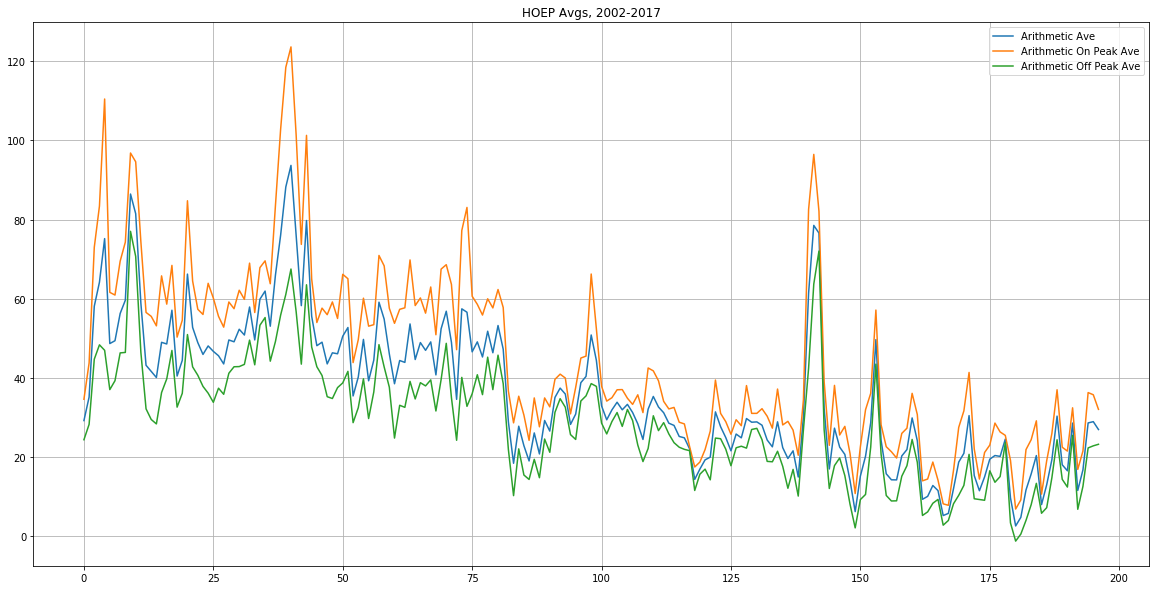

In [55]:
hoep_avgs_df[['Arithmetic Ave', 'Arithmetic On Peak Ave', 'Arithmetic Off Peak Ave']].plot(figsize=(20, 10), grid=True,
                                                                                           title='HOEP Avgs, 2002-2017')

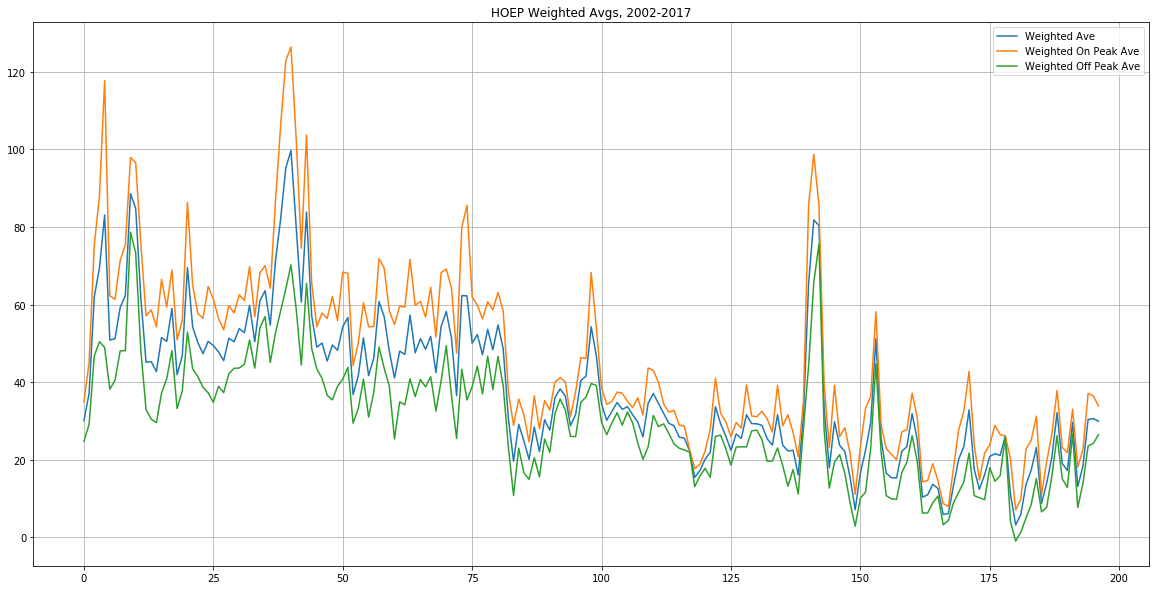

In [56]:
hoep_avgs_df[['Weighted Ave', 'Weighted On Peak Ave', 'Weighted Off Peak Ave']].plot(figsize=(20, 10), grid=True,
                                                                                     title='HOEP Weighted Avgs, 2002-2017')

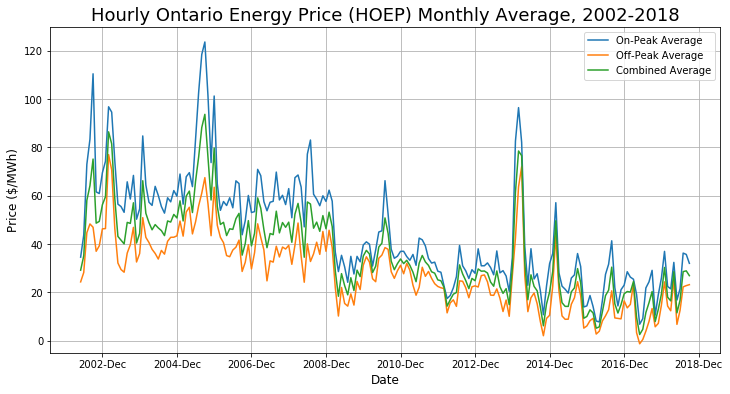

In [57]:
plt.figure(figsize=(12, 6))
plt.title('Hourly Ontario Energy Price (HOEP) Monthly Average, 2002-2018', size=18)
plt.ylim([-5, 130])
plt.ylabel('Price ($/MWh)', size=12)
plt.xlabel('Date', size=12)
# plt.xticks([7, 19, 31, 43, 55, 67, 79, 81, 93, 105, 117, 129, 141, 153, 165, 177],
#            ['2002-Dec', '2003-Dec', '2004-Dec', '2005-Dec', '2006-Dec', '2007-Dec', '2008-Dec', '2009-Dec',
#                    '2010-Dec', '2011-Dec', '2012-Dec', '2013-Dec', '2014-Dec', '2015-Dec', '2016-Dec', '2017-Dec'])
plt.xticks([7, 31, 55, 79, 103, 127, 151, 175, 199],
           ['2002-Dec', '2004-Dec', '2006-Dec', '2008-Dec', '2010-Dec', '2012-Dec', '2014-Dec', '2016-Dec', '2018-Dec'])
plt.plot(hoep_avgs_df['Month'], hoep_avgs_df[['Arithmetic On Peak Ave', 'Arithmetic Off Peak Ave', 'Arithmetic Ave']])
plt.grid()
plt.legend(labels=('On-Peak Average', 'Off-Peak Average', 'Combined Average'), loc='upper right')
plt.savefig('mean_monthly_HOEP.png')
plt.show();

### 2017 Pricing Data

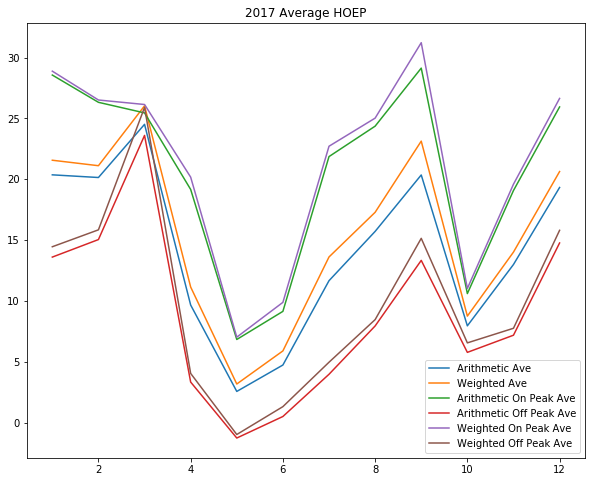

In [58]:
hoep_avgs_df['year'] = hoep_avgs_df['Month'].apply(lambda x: int(x[0:4]))
hoep_avgs_2017_df = hoep_avgs_df[hoep_avgs_df['year'] == 2017].drop('year', axis=1)
hoep_avgs_2017_df.index = pd.Int64Index(range(1, 13))
hoep_avgs_2017_df.plot(figsize=(10, 8), title='2017 Average HOEP')

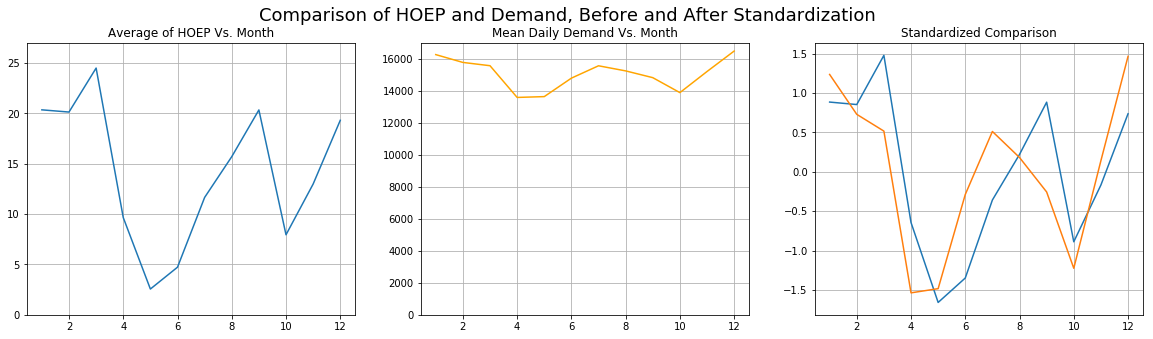

In [59]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.title('Average of HOEP Vs. Month')
plt.plot(hoep_avgs_2017_df['Arithmetic Ave'])
plt.ylim([0, 27])
plt.grid()

plt.subplot(1, 3, 2)
plt.title('Mean Daily Demand Vs. Month')
plt.plot(monthly_mean17, color='orange')
plt.ylim([0, 17000])
plt.grid()

plt.subplot(1, 3, 3)
plt.title('Standardized Comparison')
temp = hoep_avgs_2017_df['Arithmetic Ave']
hoep_avgs_2017_standard = (temp - temp.mean()) / temp.std()
temp = monthly_mean17
daily_mean17_standard = (temp - temp.mean()) / temp.std()
std_2017_hoep_demand_df = pd.DataFrame({'standardized_hoep': hoep_avgs_2017_standard, 'standardized_demand': daily_mean17_standard})
plt.plot(std_2017_hoep_demand_df)
plt.grid()

plt.suptitle('Comparison of HOEP and Demand, Before and After Standardization', size=18)
plt.show()

In [85]:
std_2017_hoep_demand_df.corr()

,standardized_hoep,standardized_demand
standardized_hoep,1.000000,0.735763
standardized_demand,0.735763,1.000000


In [81]:
print('Max of hoep_avgs_2017_df["Arithmetic Ave"]:', hoep_avgs_2017_df['Arithmetic Ave'].max())
print('Min of hoep_avgs_2017_df["Arithmetic Ave"]:', hoep_avgs_2017_df['Arithmetic Ave'].min())
print('Ratio of Max to Min:', hoep_avgs_2017_df['Arithmetic Ave'].max() / hoep_avgs_2017_df['Arithmetic Ave'].min())
print('Max of monthly_mean17:', monthly_mean17.max())
print('Min of monthly_mean17:', monthly_mean17.min())
print('Ratio of Max to Min:', monthly_mean17.max() / monthly_mean17.min())

Max of hoep_avgs_2017_df["Arithmetic Ave"]: 24.51
Min of hoep_avgs_2017_df["Arithmetic Ave"]: 2.56
Ratio of Max to Min: 9.57421875
Max of monthly_mean17: 16496.293010752688
Min of monthly_mean17: 13595.3
Ratio of Max to Min: 1.213382051940942


The above plots suggest that for 2017 the monthly weighted average of HOEP was responding to changes in the mean daily demand for energy. However these changes were vastly out of proportion. The maximum of weighted average price was about 821% of its minimum, while the maximum of mean daily demand was only about 121% of its minimum.

### Comparison of 2013-2017 monthly HOEP and demand

In [61]:
hoep_avgs_13_17 = hoep_avgs_df[(hoep_avgs_df['year'] >= 2013) & (hoep_avgs_df['year'] <= 2017)]
hoep_avgs_13_17.head()

,Month,Arithmetic Ave,Weighted Ave,Arithmetic On Peak Ave,Arithmetic Off Peak Ave,Weighted On Peak Ave,Weighted Off Peak Ave,year
128,2013-Jan,29.71,31.59,38.04,22.23,39.30,23.29,2013
129,2013-Feb,28.78,29.31,31.01,26.94,31.27,27.44,2013
130,2013-Mar,28.86,29.26,31.02,27.23,31.09,27.64,2013
131,2013-April,28.02,28.86,32.20,24.36,32.52,25.15,2013
132,2013-May,24.28,25.38,30.29,18.88,30.55,19.60,2013


In [62]:
monthly_mean.head()

year_month
2013-01-01    17324.606183
2013-02-01    17473.580357
2013-03-01    16073.009409
2013-04-01    15201.258333
2013-05-01    14496.537634
Name: Ontario Demand, dtype: float64

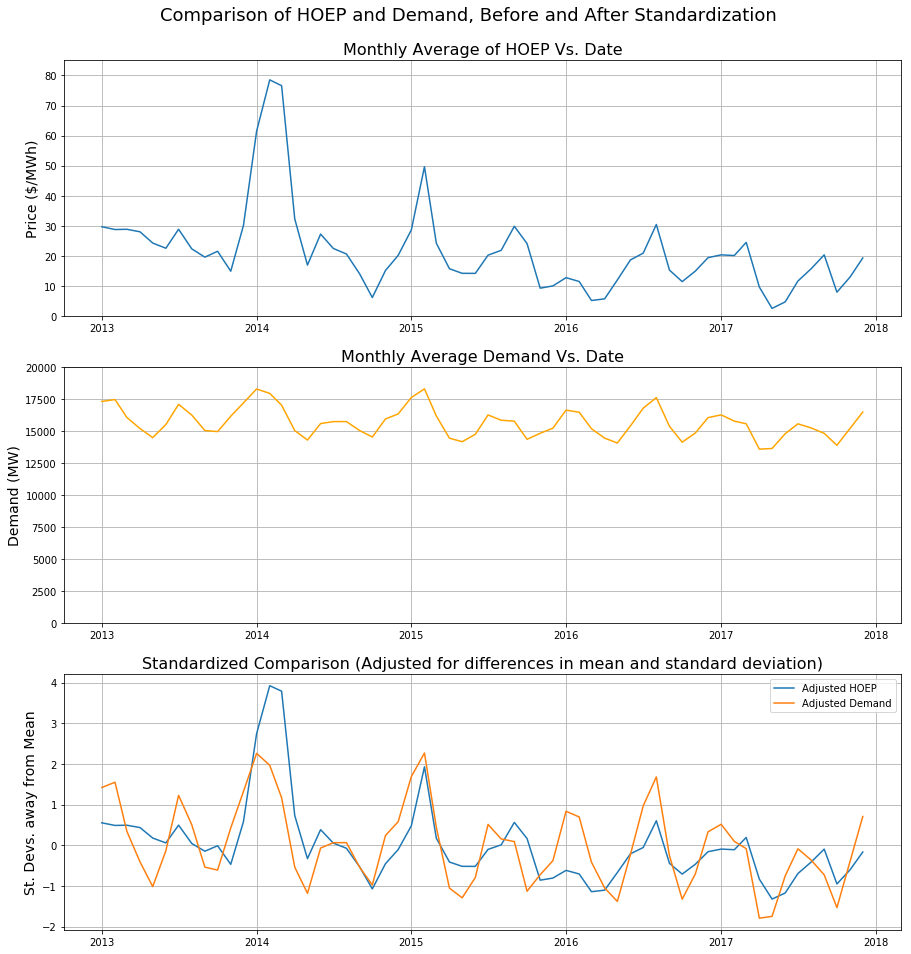

In [83]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
plt.title('Monthly Average of HOEP Vs. Date', size=16)
plt.plot(monthly_mean.index.values, hoep_avgs_13_17['Arithmetic Ave'].values)
plt.ylim([0, 85])
plt.ylabel('Price ($/MWh)', size=14)
plt.grid()

plt.subplot(3, 1, 2)
plt.title('Monthly Average Demand Vs. Date', size=16)
plt.plot(monthly_mean, color='orange')
plt.ylim([0, 20000])
plt.ylabel('Demand (MW)', size=14)
plt.grid()

plt.subplot(3, 1, 3)
plt.title('Standardized Comparison (Adjusted for differences in mean and standard deviation)', size=16)
plt.ylabel('St. Devs. away from Mean', size=14)
temp = hoep_avgs_13_17['Arithmetic Ave']
hoep_avgs_standard = (temp - temp.mean()) / temp.std()
temp = monthly_mean
monthly_mean_standard = (temp - temp.mean()) / temp.std()
std_hoep_demand_df = pd.DataFrame({'std_hoep': hoep_avgs_standard.values, 'std_demand': monthly_mean_standard.values},
                                 index=monthly_mean.index)
plt.plot(std_hoep_demand_df)
plt.legend(labels=('Adjusted HOEP', 'Adjusted Demand'))
plt.grid()

plt.suptitle('Comparison of HOEP and Demand, Before and After Standardization', size=18)
plt.subplots_adjust(top=0.93)
plt.savefig('HOEP_demand_comparison.png')
plt.show()

In [84]:
std_hoep_demand_df.corr()

,std_hoep,std_demand
std_hoep,1.000000,0.677313
std_demand,0.677313,1.000000


In [82]:
print('Max of hoep_avgs_13_17["Arithmetic Ave"]:', hoep_avgs_13_17['Arithmetic Ave'].max())
print('Min of hoep_avgs_13_17["Arithmetic Ave"]:', hoep_avgs_13_17['Arithmetic Ave'].min())
print('Ratio of Max to Min:', hoep_avgs_13_17['Arithmetic Ave'].max() / hoep_avgs_13_17['Arithmetic Ave'].min())
print('Max of monthly_mean17:', monthly_mean.max())
print('Min of monthly_mean17:', monthly_mean.min())
print('Ratio of Max to Min:', monthly_mean.max() / monthly_mean.min())

Max of hoep_avgs_13_17["Arithmetic Ave"]: 78.53
Min of hoep_avgs_13_17["Arithmetic Ave"]: 2.56
Ratio of Max to Min: 30.67578125
Max of monthly_mean17: 18306.96279761905
Min of monthly_mean17: 13595.3
Ratio of Max to Min: 1.3465655629238817


As with the 2017 comparison, there is a quite significant positive correlation (0.677) between standardized price and standardized demand. However the scale of changes in the 5-year data were were even more out-of-proportion than for the 2017 data. The maximum of weighted average price was about 3068% of its minimum, while the maximum of mean daily demand was only about 135% of its minimum.

### 2017 HOEP data

In [64]:
hoep_17_df = pd.read_csv('PUB_PriceHOEPPredispOR_2017.csv', skiprows=3)
hoep_17_df.head(24)

,Date,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min
0,2017-01-01,1,0,5.94,0.00,0.00,NaN,NaN,NaN
1,2017-01-01,2,0,0.00,2.20,0.00,NaN,NaN,NaN
2,2017-01-01,3,0,0.00,0.00,0.00,NaN,NaN,NaN
3,2017-01-01,4,0,0.00,0.00,0.00,NaN,NaN,NaN
4,2017-01-01,5,0,0.00,0.00,0.00,NaN,NaN,NaN
5,2017-01-01,6,0,0.01,0.00,1.99,NaN,NaN,NaN
6,2017-01-01,7,0,5.94,6.04,6.02,NaN,NaN,NaN
7,2017-01-01,8,1.71,6.74,8.42,6.74,NaN,NaN,NaN
8,2017-01-01,9,0,5.74,5.70,5.84,NaN,NaN,NaN
9,2017-01-01,10,0,5.94,5.94,0.00,NaN,NaN,NaN


In [65]:
hoep_17_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 9 columns):
Date                  8760 non-null object
Hour                  8760 non-null int64
HOEP                  8760 non-null object
Hour 1 Predispatch    8758 non-null float64
Hour 2 Predispatch    8758 non-null float64
Hour 3 Predispatch    8758 non-null float64
OR 10 Min Sync        0 non-null float64
OR 10 Min non-sync    0 non-null float64
OR 30 Min             0 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 616.0+ KB


In [66]:
hoep_17_df.drop(['OR 10 Min Sync', 'OR 10 Min non-sync', 'OR 30 Min'], axis=1, inplace=True)

In [67]:
hoep_17_df['HOEP'] = hoep_17_df['HOEP'].apply(lambda x: float(x.replace(',', '')))
hoep_17_df.describe()

,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch
count,8760.000000,8760.000000,8758.000000,8758.000000,8758.000000
mean,12.500000,14.138285,14.935522,14.991435,14.935840
std,6.922582,36.249021,17.209148,16.803016,16.351468
min,1.000000,-67.080000,-5.000000,-5.000000,-10.000000
25%,6.750000,0.000000,0.000000,0.000000,0.000000
50%,12.500000,7.365000,13.000000,13.000000,13.000000
75%,18.250000,20.562500,26.000000,25.787500,29.770000
max,24.000000,1822.950000,393.720000,393.780000,200.000000


In [68]:
hoep_17_df['Date'] = pd.to_datetime(hoep_17_df['Date'])
hoep_17_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
Date                  8760 non-null datetime64[ns]
Hour                  8760 non-null int64
HOEP                  8760 non-null float64
Hour 1 Predispatch    8758 non-null float64
Hour 2 Predispatch    8758 non-null float64
Hour 3 Predispatch    8758 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 410.7 KB


In [69]:
hoep_17_df['month'] = hoep_17_df['Date'].apply(lambda x: x.month)
hoep_17_df['month'].value_counts()

7     744
5     744
12    744
3     744
10    744
1     744
8     744
6     720
4     720
11    720
9     720
2     672
Name: month, dtype: int64

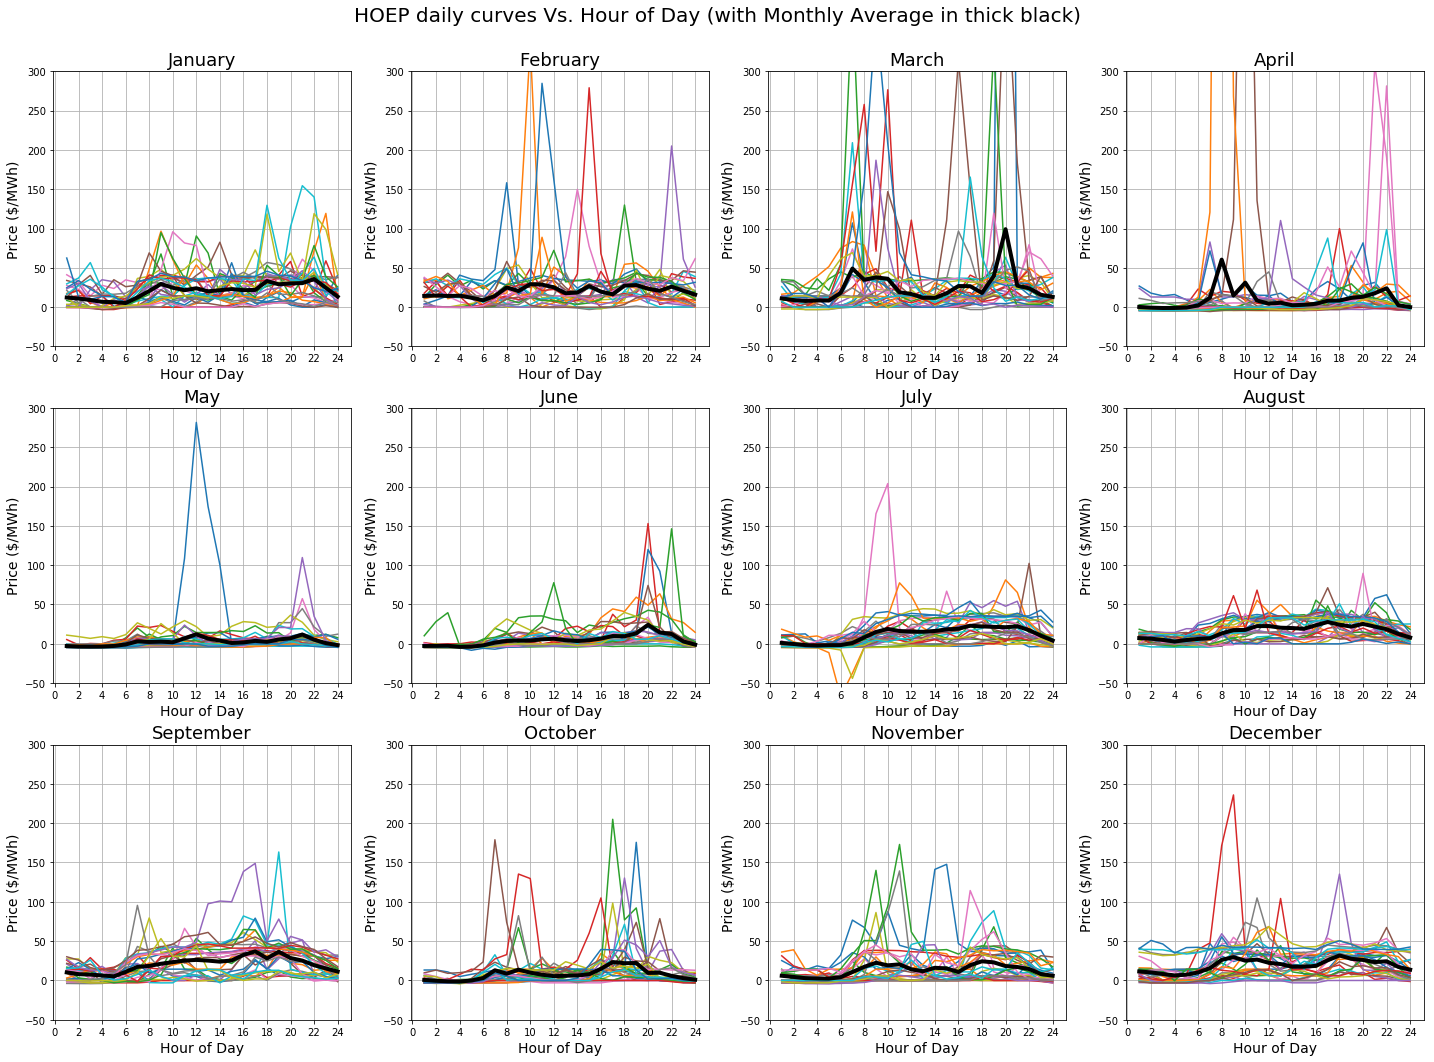

In [88]:
months_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
plt.figure(figsize=(20, 15))
hoep_17_month_avgs = []
for month, df_month in hoep_17_df.groupby('month'):
    plt.subplot(3, 4, month)
    plt.title(months_dict[month], size=18)
    cols = []
    for day, df_day in df_month.groupby('Date'):
        cols.append(df_day['HOEP'].values)
    cols = np.array(cols).T
    cols_avg = np.mean(cols, axis=1)
    hoep_17_month_avgs.append(cols_avg)
    plt.ylim([-50, 300])
    #plt.yticks(range(0, 22001, 2000))
    plt.xticks(np.arange(0, 25, 2))
    plt.ylabel('Price ($/MWh)', size=14)
    plt.xlabel('Hour of Day', size=14)
    plt.plot(np.arange(1, 25), cols)
    plt.plot(np.arange(1, 25), cols_avg, linewidth=4, color='black')
    plt.grid()

plt.suptitle('HOEP daily curves Vs. Hour of Day (with Monthly Average in thick black)', size=20)
plt.tight_layout(pad=1.0, h_pad=1)
plt.subplots_adjust(top=0.92)
plt.savefig('2017_HOEP_curves_by_month.png')
plt.show();

The means are distinctly skewed by the high outlier values...

### The number of zero values and negative values in the 2017 hourly HOEP data

In [71]:
hoep_17_df.shape

(8760, 7)

In [72]:
hoep_17_df[hoep_17_df['HOEP'] < 0].shape

(1630, 7)

In [73]:
hoep_17_df[hoep_17_df['HOEP'] == 0].shape

(1057, 7)

### Checking HOEP Averages including the 0s and negatives

In [74]:
hoep_17_df.groupby('month')['HOEP'].agg('mean')

month
1     20.356196
2     20.143973
3     24.512312
4      9.663208
5      2.562957
6      4.726778
7     11.664718
8     15.706909
9     20.350958
10     7.953145
11    12.990667
12    19.324234
Name: HOEP, dtype: float64

In [75]:
hoep_avgs_df[hoep_avgs_df['year'] == 2017]['Arithmetic Ave']

176    20.36
177    20.14
178    24.51
179     9.66
180     2.56
181     4.73
182    11.66
183    15.71
184    20.35
185     7.95
186    12.99
187    19.32
Name: Arithmetic Ave, dtype: float64

The calculated averages, including negative values, match the data from the separate file "HOEPMonthlyAverages.csv".

### 2017 HOEP "v1" data
For each "20XX" HOEP file there's a "20XX_v1" file, such as "PUB_PriceHOEPPredispOR_2017_v1.csv", which may or may not be different from the "2017" file. Here I start to look at one for obvious differences.

In [76]:
hoep_17_v1_df = pd.read_csv('PUB_PriceHOEPPredispOR_2017_v1.csv', skiprows=3)
hoep_17_v1_df.loc[5:10]

,Date,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min
5,2017-01-01,6,0,0.01,0.00,1.99,NaN,NaN,NaN
6,2017-01-01,7,0,5.94,6.04,6.02,NaN,NaN,NaN
7,2017-01-01,8,1.71,6.74,8.42,6.74,NaN,NaN,NaN
8,2017-01-01,9,0,5.74,5.70,5.84,NaN,NaN,NaN
9,2017-01-01,10,0,5.94,5.94,0.00,NaN,NaN,NaN
10,2017-01-01,11,0.82,6.92,6.92,5.90,NaN,NaN,NaN


In [77]:
hoep_17_v1_df.loc[5:10]

,Date,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min
5,2017-01-01,6,0,0.01,0.00,1.99,NaN,NaN,NaN
6,2017-01-01,7,0,5.94,6.04,6.02,NaN,NaN,NaN
7,2017-01-01,8,1.71,6.74,8.42,6.74,NaN,NaN,NaN
8,2017-01-01,9,0,5.74,5.70,5.84,NaN,NaN,NaN
9,2017-01-01,10,0,5.94,5.94,0.00,NaN,NaN,NaN
10,2017-01-01,11,0.82,6.92,6.92,5.90,NaN,NaN,NaN


In [78]:
hoep_17_v1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 9 columns):
Date                  8760 non-null object
Hour                  8760 non-null int64
HOEP                  8760 non-null object
Hour 1 Predispatch    8758 non-null float64
Hour 2 Predispatch    8758 non-null float64
Hour 3 Predispatch    8758 non-null float64
OR 10 Min Sync        0 non-null float64
OR 10 Min non-sync    0 non-null float64
OR 30 Min             0 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 616.0+ KB


In [79]:
hoep_17_v1_df.describe()

,Hour,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min
count,8760.000000,8758.000000,8758.000000,8758.000000,0.0,0.0,0.0
mean,12.500000,14.935522,14.991435,14.935840,NaN,NaN,NaN
std,6.922582,17.209148,16.803016,16.351468,NaN,NaN,NaN
min,1.000000,-5.000000,-5.000000,-10.000000,NaN,NaN,NaN
25%,6.750000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,12.500000,13.000000,13.000000,13.000000,NaN,NaN,NaN
75%,18.250000,26.000000,25.787500,29.770000,NaN,NaN,NaN
max,24.000000,393.720000,393.780000,200.000000,NaN,NaN,NaN


In [80]:
hoep_17_df.describe()

,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,month
count,8760.000000,8760.000000,8758.000000,8758.000000,8758.000000,8760.000000
mean,12.500000,14.138285,14.935522,14.991435,14.935840,6.526027
std,6.922582,36.249021,17.209148,16.803016,16.351468,3.448048
min,1.000000,-67.080000,-5.000000,-5.000000,-10.000000,1.000000
25%,6.750000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,12.500000,7.365000,13.000000,13.000000,13.000000,7.000000
75%,18.250000,20.562500,26.000000,25.787500,29.770000,10.000000
max,24.000000,1822.950000,393.720000,393.780000,200.000000,12.000000


If there are any differences, they're too small to have any observable effects on the these aggregate statistics.